In [37]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set up my automated browser with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [38]:
# Visit the website and copy the content
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)
html = browser.html
html_soup = soup(html, 'html.parser')

In [39]:
# Find the table
table = html_soup.find_all('table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [40]:
# Store the data into a pandas df
df = pd.read_html(str(table))[0]

# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [41]:
# Close browser
browser.quit()

In [42]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [43]:
# Change data types for data analysis
df['terrestrial_date'] = df['terrestrial_date'].astype('datetime64')

In [44]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [45]:
# 1. How many months are there on Mars?
months_on_mars = df['month'].max()
print(f'There are',months_on_mars,'months on Mars.')

There are 12 months on Mars.


In [46]:
# 2. How many Martian days' worth of data are there?
total_martian_days_of_data = len(df['sol'])
total_martian_days_of_data

1867

In [51]:
# 3. What is the average low temperature by month?
df_months_and_ls = df[['month', 'min_temp']]
avg_min_temp_by_month_df = df_months_and_ls.groupby('month', as_index=False).mean()
avg_min_temp_by_month_df.rename(columns= {'min_temp':'avg_min_temp'},inplace=True)
avg_min_temp_by_month_df

,month,avg_min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


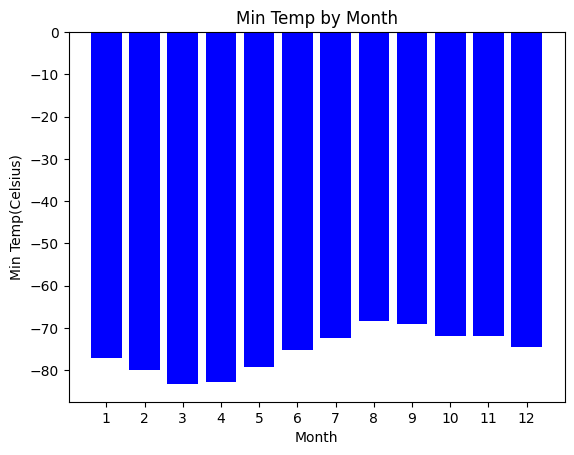

In [53]:
# Plot the average temperature by month
plt.bar(avg_min_temp_by_month_df['month'],avg_min_temp_by_month_df['avg_min_temp'], color='blue')
plt.title('Min Temp by Month')
plt.ylabel('Min Temp(Celsius)')
plt.xlabel('Month')
plt.xticks(np.arange(min(avg_min_temp_by_month_df['month']), max(avg_min_temp_by_month_df['month'])+1, 1))
plt.savefig('analysis/avg_min_temp_by_month_bar.png', bbox_inches = 'tight', facecolor = 'w')


In [54]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_min_temp_by_month_df['avg_min_temp'].min()
coldest_month = avg_min_temp_by_month_df.loc[avg_min_temp_by_month_df['avg_min_temp']==coldest_month]
coldest_month


,month,avg_min_temp
2,3,-83.307292


In [61]:
# 4. Average pressure by Martian month
df_months_and_pressure = df[['month', 'pressure']]
df_month_pressure = df_months_and_pressure.groupby('month', as_index=False).mean()
df_month_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [87]:
# What month has the lowest avg pressure?
lowest_avg_pressure = df_month_pressure[df_month_pressure['pressure']==df_month_pressure['pressure'].min()]
lowest_avg_pressure

,month,pressure
5,6,745.054422


In [88]:
highest_avg_pressure = df_month_pressure[df_month_pressure['pressure']==df_month_pressure['pressure'].max()]
highest_avg_pressure

,month,pressure
8,9,913.30597


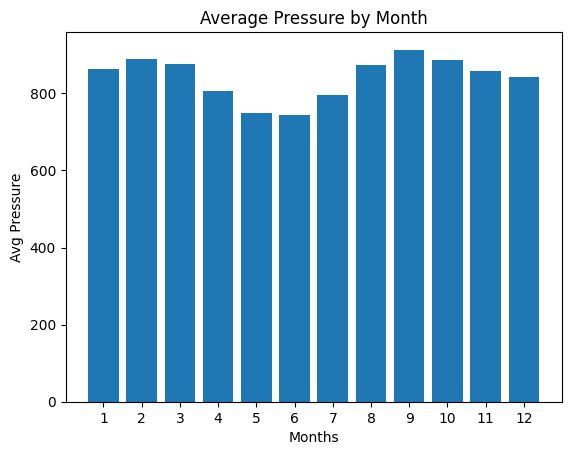

In [89]:
# Plot the average pressure by month
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'])
plt.title('Average Pressure by Month')
plt.xlabel("Months")
plt.ylabel("Avg Pressure")
plt.xticks(np.arange(min(df_month_pressure['month']), max(df_month_pressure['month'])+1, 1))
plt.savefig('analysis/avg_pressure_by_month_bar.png', bbox_inches = 'tight', facecolor = 'w')


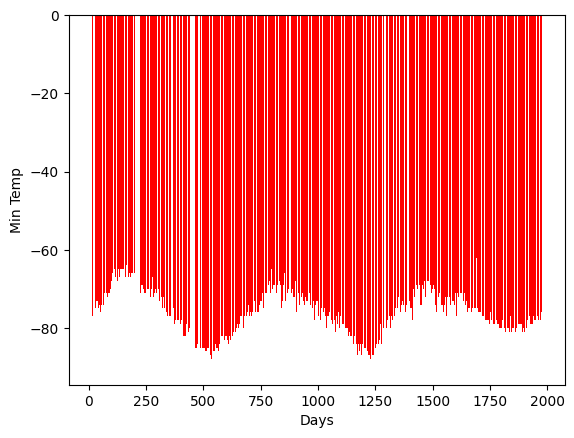

In [103]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.bar(df['sol'],df['min_temp'], color='red')
plt.xlabel('Days')
plt.ylabel('Min Temp')
plt.savefig('analysis/dailyt_min_temp_tracked_by_Curiosity.png', bbox_inches = 'tight', facecolor = 'w')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [104]:
# Write the data to a CSV
df.to_csv('analysis/mars_table.csv',index=False)